# Feature selection for Linear Regression on the Possum Dataset with removing of outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Read Possum data to dataframe

In [2]:
possum = pd.read_csv('possum.csv')
print(possum.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


## First preprocessing - delete 'case' column as it is just an index

In [3]:
possum = possum.drop('case', axis=1)
print(possum.head())

   site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
0     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5      54.5   
1     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5      51.2   
2     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4      51.9   
3     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1      52.2   
4     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0      53.2   

    eye  chest  belly  
0  15.2   28.0   36.0  
1  16.0   28.5   33.0  
2  15.5   30.0   34.0  
3  15.2   28.0   34.0  
4  15.1   28.5   33.0  


## Handle missing data

### count missing values

In [4]:
print(possum.isna().sum())

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


### calculate threshold for dropping observations with missing values

In [5]:
treshold = len(possum) * 0.05
print(treshold)

5.2


### drop all rows with missing values for columns below treshold

In [6]:
cols_to_drop = possum.columns[possum.isna().sum() <= treshold]
print(cols_to_drop)

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [7]:
possum.dropna(subset=cols_to_drop, inplace=True)

In [8]:
print(possum.isna().sum())

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


## Identify and remove outliers

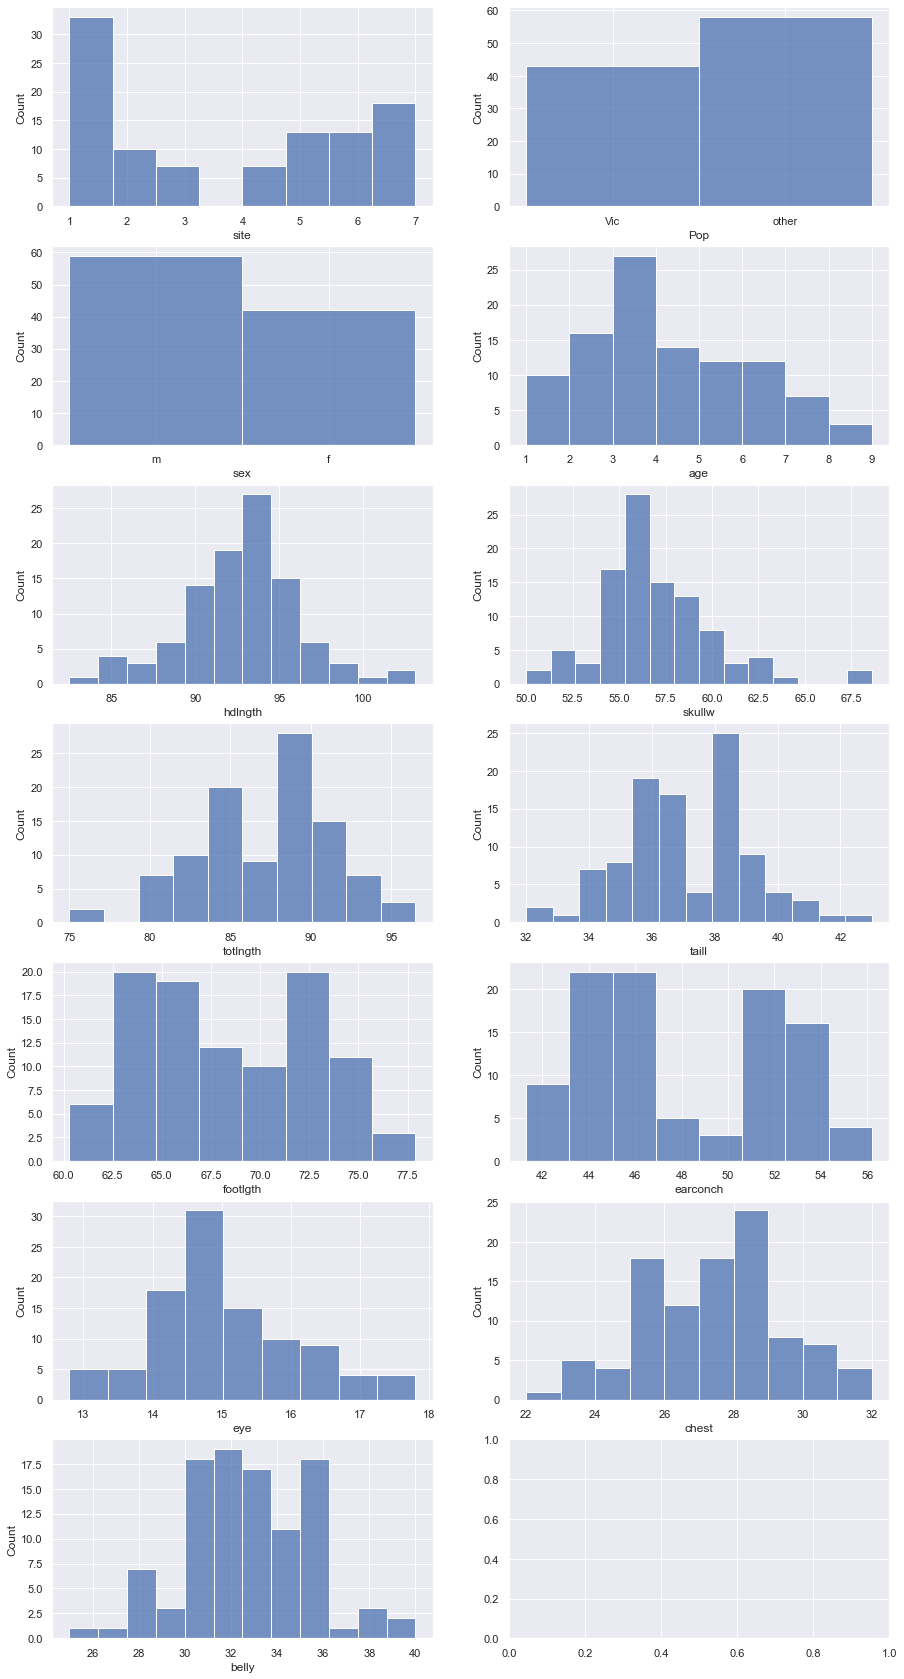

In [9]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(7, 2, figsize=(15, 30))
sns.histplot(data=possum, x='site', ax=axs[0, 0])
sns.histplot(data=possum, x='Pop', ax=axs[0, 1])
sns.histplot(data=possum, x='sex', ax=axs[1, 0])
sns.histplot(data=possum, x='age', ax=axs[1, 1])
sns.histplot(data=possum, x='hdlngth', ax=axs[2, 0])
sns.histplot(data=possum, x='skullw', ax=axs[2, 1])
sns.histplot(data=possum, x='totlngth', ax=axs[3, 0])
sns.histplot(data=possum, x='taill', ax=axs[3, 1])
sns.histplot(data=possum, x='footlgth', ax=axs[4, 0])
sns.histplot(data=possum, x='earconch', ax=axs[4, 1])
sns.histplot(data=possum, x='eye', ax=axs[5, 0])
sns.histplot(data=possum, x='chest', ax=axs[5, 1])
sns.histplot(data=possum, x='belly', ax=axs[6, 0])
plt.show()

site, Pop and sex are categorical data and needs to be converted. For numerical data skullw and totlngth seem to have outliers.

### remove outliers from skullw

Detect and remove outliers with standard deviation based detection. Calculate mean and standard deviation (std) for skullw and drop all values that are below / above 3 * std.

In [10]:
mean = possum['skullw'].mean()
print(mean)
std = possum['skullw'].std()
print(std)

56.96039603960398
3.1026788170199247


In [11]:
cut_off = 3 * std
print(cut_off)

9.308036451059774


In [12]:
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

47.6523595885442
66.26843249066376


In [13]:
print(possum['skullw'].min())
print(possum['skullw'].max())

50.0
68.6


As the maximum value of skullw lies above the upper boundary we have outliers to remove.

In [14]:
possum = possum[(possum['skullw'] < upper) & (possum['skullw'] > lower)]

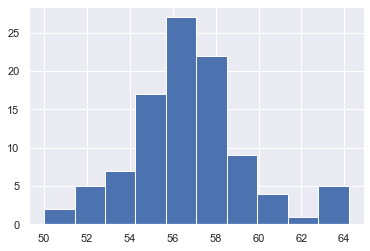

In [15]:
possum['skullw'].hist()
plt.show()

### remove outliers from totlngth

In [16]:
mean = possum['totlngth'].mean()
print(mean)
std = possum['totlngth'].std()
print(std)

87.27979797979799
4.220503398691109


In [17]:
cut_off = 3 * std
print(cut_off)

12.661510196073328


In [18]:
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

74.61828778372467
99.94130817587131


In [19]:
print(possum['totlngth'].min())
print(possum['totlngth'].max())

75.0
96.5


As we can see the minimum and maximum values of totlngth are already between the lower and upper boundaries so we don't have outliers to remove.

## Convert categorical data

In [20]:
print(possum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      99 non-null     int64  
 1   Pop       99 non-null     object 
 2   sex       99 non-null     object 
 3   age       99 non-null     float64
 4   hdlngth   99 non-null     float64
 5   skullw    99 non-null     float64
 6   totlngth  99 non-null     float64
 7   taill     99 non-null     float64
 8   footlgth  99 non-null     float64
 9   earconch  99 non-null     float64
 10  eye       99 non-null     float64
 11  chest     99 non-null     float64
 12  belly     99 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.8+ KB
None


#### => We have to deal with Pop and sex. What about site?

In [21]:
print(possum['site'].nunique())

7


Site contains categorical data encoded as ordinal data. Since there is no natural order between the values of site, it may be better to use OneHotEncoding.

####  convert 'Pop' and 'sex' 

In [22]:
print(possum['Pop'].nunique())
print(possum['sex'].nunique())

2
2


Pop and sex contain categorical data with no natural order between the values, so we should use OneHotEncoding (or in this case LabelEncoding as well, as there are just 2 values for each Pop and sex and a LabelEncoding would result in 0 - 1 values.)

In [23]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(possum))
print(X)

[[ 1.   0.   0.  ... 15.2 28.  36. ]
 [ 1.   0.   0.  ... 16.  28.5 33. ]
 [ 1.   0.   0.  ... 15.5 30.  34. ]
 ...
 [ 0.   0.   0.  ... 13.  25.  30. ]
 [ 0.   0.   0.  ... 15.4 25.  29. ]
 [ 0.   0.   0.  ... 14.8 28.5 33.5]]


We now have a numpy matrix with only numerical data and without missing values that we can buil our Regression models from.

### Feature selection techniques

#### 1. Filter method using Pearson correlation matrix

Correlation matrix can only be used on columns with numerical data, so we have to drop the columns site, Pop and sex first.

In [24]:
possum_numerical = possum.drop(['site', 'Pop', 'sex'], axis=1)
print(possum_numerical.head())

   age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0  8.0     94.1    60.4      89.0   36.0      74.5      54.5  15.2   28.0   
1  6.0     92.5    57.6      91.5   36.5      72.5      51.2  16.0   28.5   
2  6.0     94.0    60.0      95.5   39.0      75.4      51.9  15.5   30.0   
3  6.0     93.2    57.1      92.0   38.0      76.1      52.2  15.2   28.0   
4  2.0     91.5    56.3      85.5   36.0      71.0      53.2  15.1   28.5   

   belly  
0   36.0  
1   33.0  
2   34.0  
3   34.0  
4   33.0  


In [25]:
cor = possum_numerical.corr()
print(cor)

               age   hdlngth    skullw  totlngth     taill  footlgth  \
age       1.000000  0.341957  0.371362  0.285835  0.124710  0.149255   
hdlngth   0.341957  1.000000  0.796130  0.672608  0.280315  0.414666   
skullw    0.371362  0.796130  1.000000  0.606529  0.341194  0.332919   
totlngth  0.285835  0.672608  0.606529  1.000000  0.562750  0.478394   
taill     0.124710  0.280315  0.341194  0.562750  1.000000 -0.119711   
footlgth  0.149255  0.414666  0.332919  0.478394 -0.119711  1.000000   
earconch  0.092776  0.127615  0.020445  0.170095 -0.401452  0.778563   
eye       0.233556  0.358591  0.404478  0.246412  0.187366  0.014356   
chest     0.351975  0.620191  0.649902  0.563171  0.165372  0.487895   
belly     0.358698  0.551262  0.554829  0.505224  0.294342  0.320285   

          earconch       eye     chest     belly  
age       0.092776  0.233556  0.351975  0.358698  
hdlngth   0.127615  0.358591  0.620191  0.551262  
skullw    0.020445  0.404478  0.649902  0.554829  
tot

##### Visualize the correlation matrix with a heatmap

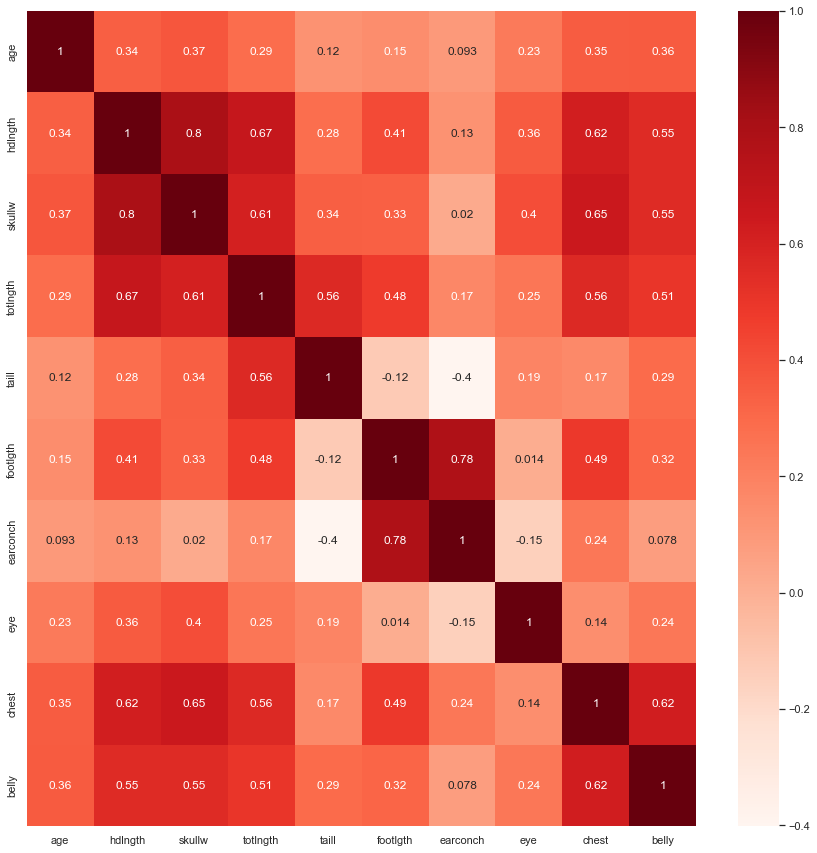

In [26]:
plt.figure(figsize=(15, 15))
#sns.set(font_scale=1.5)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Select best features subset for target skullw (output variable)

In [27]:
cor_target = abs(cor["skullw"])
#print(cor_target)
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)

hdlngth     0.796130
skullw      1.000000
totlngth    0.606529
chest       0.649902
belly       0.554829
Name: skullw, dtype: float64


Now we need to check if the relevant features (hdlngth, totlngth, chest and belly) are correlated with each other, because for Linear Regression the indenpendent variables need to be uncorrelated with each other.

In [28]:
print(possum_numerical[["hdlngth", "totlngth"]].corr())

           hdlngth  totlngth
hdlngth   1.000000  0.672608
totlngth  0.672608  1.000000


In [29]:
print(possum_numerical[["hdlngth", "chest"]].corr())

          hdlngth     chest
hdlngth  1.000000  0.620191
chest    0.620191  1.000000


In [30]:
print(possum_numerical[["hdlngth", "belly"]].corr())

          hdlngth     belly
hdlngth  1.000000  0.551262
belly    0.551262  1.000000


As we can see hdlngth and totlngth are the most highly correlated with each other, so we drop totlngth and keep hdlngth (because it is higher correlated with skullw).

In [31]:
print(possum_numerical[["chest", "belly"]].corr())

         chest    belly
chest  1.00000  0.62316
belly  0.62316  1.00000


We keep chest and belly with medium correlations between each other (maybe we drop them later if LinearRegression doesn't perform well).

#### => Our subset of best features for prediction of skullw is hdlngth, chest and belly. 

#### Let's build a simple Linear Regression Model with these features

In [32]:
X_best_features = possum_numerical[["hdlngth", "chest", "belly"]].iloc[:, :].values
#print(X_best_features)
y = possum_numerical[["skullw"]].iloc[:, :].values
#print(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, random_state=0)

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
print(r2_score(y_test, y_pred))

0.6372938618340691


#### => not a really good result

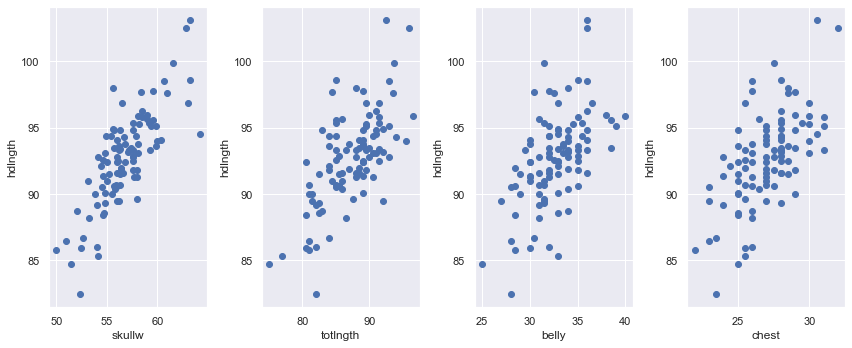

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.scatter(possum_numerical["skullw"], possum_numerical["hdlngth"])
plt.xlabel("skullw")
plt.ylabel("hdlngth")

plt.subplot(1, 4, 2)
plt.scatter(possum_numerical["totlngth"], possum_numerical["hdlngth"])
plt.xlabel("totlngth")
plt.ylabel("hdlngth")

plt.subplot(1, 4, 3)
plt.scatter(possum_numerical["belly"], possum_numerical["hdlngth"])
plt.xlabel("belly")
plt.ylabel("hdlngth")

plt.subplot(1, 4, 4)
plt.scatter(possum_numerical["chest"], possum_numerical["hdlngth"])
plt.xlabel("chest")
plt.ylabel("hdlngth")

plt.tight_layout()
plt.show()

#### Visualize interaction between different features using pairplot

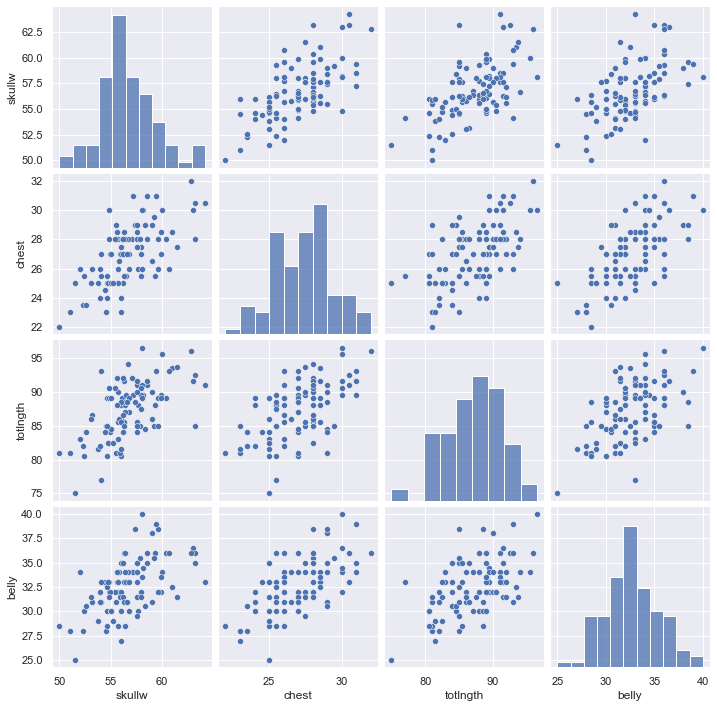

In [38]:
sns.pairplot(possum_numerical[["skullw", "chest", "totlngth", "belly"]])
plt.show()